# Basic New Keynesian (NK) model

This introductory notebook demonstrates the basics of the New-Keynesian (NK) model used in economics

The materials and equations are from Chapter 3 of following book:
- Costa, C. (2018). Understanding DSGE models: Theory and Applications. Vernon Press.
    - [Amazon link for book](https://www.amazon.com/gp/product/B01LXPPOA6?pf_rd_r=ZHR3A69BS93PKMTAXK0P&pf_rd_p=edaba0ee-c2fe-4124-9f5d-b31d6b1bfbee)

This book is brilliant and I highly recommend to anyone interested in studying the DSGE modeling regime used in macroeconomics.


# Table of contents 

- [1. Theoretical review](#1.-Theoretical-review)
- [2. The NK model](#2.-The-NK-Model)
- [3. Equilibrium conditions](#3.-Equilibrium-conditions)
- [4. Solve steady state](#4.-Solve-steady-state)
- [5. Log-linearization](#5.-Log-linearization)

In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')

# 1. Theoretical review


#### NK model structure
- Household behavior: similar to RBC models


- Firm behavior: vastly different than RBC because we no longer assume imperfect competition
    - As a result we now include two sectors of firms:
        1. Wholesalers: producers of intermediate goods
            - Imperfect competition only assumed in the wholesaler market!
        2. Retailers: producers of final goods
            - Perfect competition assumed
      

    

## 1.1 Differentiated products and the consumption aggregator

Consumption aggregator function
$$C=C(c_1,c_2,\cdots, C_N)=\Big[(c_1)^{\frac{\psi-1}{\psi}}+(c_2)^{\frac{\psi-1}{\psi}}(c_N)^{\frac{\psi-1}{\psi}}\Big]^{{\frac{\psi}{\psi-1}}}$$
Where:
- $c_1$ = Type 1 of consumer good
- $c_2$ = Type 2 of consumer good
- $\psi$= Elasticity of substitution between different goods
    - $\psi\rightarrow\infty$: goods are perfect substitutes
    - However, NK models usually assume $\frac{\psi-1}{\psi}$


Must satisfy:
1. $\frac{\partial c (.)}{\partial c_j}>0$
2. $\frac{\partial^2 c (.)}{\partial c_j^2}<0$
    - Total consumption is an increasing consumption function of a j type good


### Elasticity of substitution between two goods

$$\phi = \frac{\partial(c_1/c_2)}{\partial MRS}\cdot\frac{MRS}{c_1/c_2}=\frac{\partial Ln(c_1/c_2)}{\partial LnMRS}$$

## 1.2 Firms in monopolistic competition

- Firms in monopolistic competition have some degree of markets power
    - As a result the demand curve is negatievely sloped
    - Max profit: $P_j>MC_j$
    - NK models use monopolisitic competition to model the goods market
    

### 1.2.1 Python example: Monopolistic competition

,Q,P,TC,TR,Profit,MC,ATC,MR
0,10.0,23.0,340.0,230.0,-110.0,NaN,34.00,NaN
1,20.0,20.0,400.0,400.0,0.0,6.0,20.00,17.0
2,30.0,18.0,480.0,540.0,60.0,8.0,16.00,14.0
3,40.0,16.0,580.0,640.0,60.0,10.0,14.50,10.0
4,50.0,14.0,700.0,700.0,0.0,12.0,14.00,6.0
5,60.0,12.0,840.0,720.0,-120.0,14.0,14.00,2.0
6,70.0,10.0,1020.0,700.0,-320.0,18.0,14.57,-2.0
7,80.0,8.0,1280.0,640.0,-640.0,26.0,16.00,-6.0


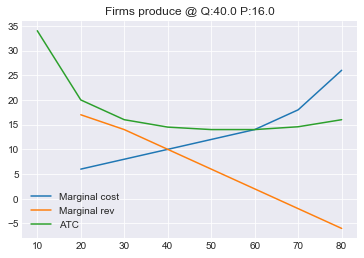

In [153]:
def imperfect_comp(Q, P, Total_cost):
    df = pd.DataFrame(data=np.vstack([Q,P,Total_cost]).T, columns= ['Q', 'P', 'TC'])
    df["TR"] = Q*P 
    df["Profit"] = df.TR-df.TC
    df["MC"] = df.TC.diff()/df.Q.diff()
    df["ATC"] = df.TC/df.Q
    df["MR"] = df.TR.diff()/df.Q.diff() #Same as demand curve
    production = list(df.loc[df.MR==df.MC, ['Q','P']].values)
    plt.plot(Q,df.MC, label='Marginal cost')
    plt.plot(Q,df.MR, label='Marginal rev')
    plt.plot(Q,df.ATC, label='ATC')
    plt.title('Firms produce @ Q:{} P:{}'.format(production[0][0],production[0][1]))
    plt.legend();
    return round(df,2)

Quantities = np.linspace(10,80,8)
Price = [23,20,18,16,14,12,10,8]
Total_cost = [340,400,480,580,700,840,1020,1280]
imperfect_comp(Quantities, Price, Total_cost)

## 1.3 Price stickiness
- NK models also focus on the stickiness of:
    1. Nominal wages
    2. Product prices
    
    
- Stickness can apply to both real and nominal prices

- Stickiness occurs when price of a good or wages do not change in response shifts in demand and supply

# 2. The NK Model

## 2.1 Model assumptions from RBC
- Assumption 2.2.1. The economy is closed, with no government or financial sector.
- Assumption 2.2.2. This economy does not have a currency (Barter economy)
- Assumption 2.2.3. Adjustment costs are not present

## 2.2 Households

### 2.2.1 Households assumptions
- Assumption 2.2.4. The model is made up of a unitary set of households indexed by $j \in[0,1]$ whose goal is to maximize intertemporal welfare function. 
    - A utility function is used, additively separable into consumption (C) and labor (L).
- Assumption 2.2.5. Consumption is intertemporally additively separable (no habit formation).
- Assumption 2.2.6. Population growth is ignored
- Assumption 2.2.7. The labor market is of perfect competition (no wage rigidity).

### 2.2.2 Equations from the [RBC model](https://github.com/corybaird/DSGE_models/blob/master/RBC_Basic_Costa2018.ipynb)
- Format: (RBC eq #/NK eq #)

#### Capital accumulation over time:
$$K_{j,t+1} = (1-\delta)K_{j,t}+I_{j,t}\tag{3.1}$$

#### Household labor supply equation
Consumption-leisure MRS = Consumption-leisure relative price

$$
C_{j,t}^\sigma L^\varphi_{j,t} = \frac{W_t}{P_t}\tag{3.2}
$$

#### Euler equation
$$\Big(\frac{E_t C_{j,t+1}}{C_{j,t}}\Big)^\sigma = \beta\Big[(1-\delta)+ E_t\frac{R_{t+1}}{P_{t+1}}\Big]
\tag{3.3}$$

## 2.3 Firms
### 2.3.1 Firm assumptions
- Assumption 2.2.9. Productivity growth is ignored.
 
 
 
But we have a new assumption for the NK model:
- Assumption 3.2.1. It is assumed that the market structure is one of monopolistic competition.
    - Assumption 2.2.8 (Perfect competition) no longer holds

Producing sector divided into two parts:
1. Wholesale firms: Intermediate goods 
    - Many companies each producing differentiable goods
        - They are able to decide quantity and prices 
        
        
2. Retail firms: Final goods 

### 2.3.2 Retail firms (Final goods)
Assumption 3.2.2. Aggregate good sold by one retail firm within a structure of perfect competition. Assume all retailers are identical

- Similar to the firm assumptions made in RBC model


- There are many wholesale goods each indexed within the interval [0,1].
- Each good is produced by a single wholesaler and is imperfectly substitutable.
    - This gives wholesalers a degree of monopoly power.

To represent the problem retail firms face one widely functional form is the Dixit-Stiglitz aggregator (Dixit and Stiglitz, 1977):

$$Y_t=\Big(\int_0^1 Y_{j,t}^{\frac{\psi-1}{\psi}} dj\Big)^{\frac{\psi}{\psi-1}}\tag{3.4}$$

Where:
- $Y_t$= Product of retailers in period t
- $Y_{j,t} \text{for} \ \  j \in[0,1]=$ wholesale good j
- $\psi>1$= substitution between wholesale goods

#### Retail firm maximizing its profit function:

$P_t$= nominal price of retail product $P_{j,t}$= nominal price of wholesale good j

$$\max_{Y_{j,t}}P_tY_t=\int_0^1 P_{j,t}Y_{j,t} dj\tag{3.5}$$

$3.4\rightarrow3.5$

$$\max_{Y_{j,t}}P_t \Big(\int_0^1 Y_{j,t}^{\frac{\psi-1}{\psi}} dj\Big)^{\frac{\psi}{\psi-1}}- P_{j,t}\int_0^1 Y_{j,t} dj\tag{3.6}$$


First order condition of 3.6

Rearrange

Re-write 3.4

Eliminate RHS of f.o.c

Raise expression to power of $\psi$
$$Y_{j,t}=Y_t\big(\frac{P_t}{P_{j,t}}\big)^\psi\tag{3.7}$$

$3.7\rightarrow3.4$

#### Pricing rule for final (retail goods)
$$P_t = \Big[\int_0^1P_{j,t}^{1-\psi}dj\Big]^{\frac{1}{1-\psi}}\tag{3.8}$$



### 2.3.3 Whole-sale firms (intermediate goods)

#### 2.3.3.1 Assumptions
- Assumption 3.2.3. Monopolistic competition
    - Wholesale firms with differentiated prodcuts have a degree of market power and can thus set prices.
    
    
- Assumption 3.2.4. Fixed production costs do not exist. 
    - VC=ATC.


- Assumption 3.2.5. Per unit production cost of a wholesale product is always the same regardless of the scale of production. 
    - CRS

Assumptions 3.2.4 & 3.2.5 mean that TC = Q*MC


#### 2.3.3.2 Minimization & constraint
Whole sale firms solve maximization problem in two stages:
1. The firms takes prices on the factors of production
2. The firms determines the amount of capital and labor it will use to minimize production costs

$$\min_{L_{j,t},K_{j,t}} W_tL_{j,t}+R_tK_{j,t}\tag{3.9}$$

s.j.t technology
$$Y_{j,t}=A_tK_{j,t}^\alpha L_{j,t}^{1-\alpha}\tag{3.10}$$

With the law of motion of productivity
$$logA_t =(1-\rho_a)logA_{ss}+\rho_A logA_{t-1}+\varepsilon_t \tag{3.11}$$

Where:
- $A_{ss}$= value of productivity at steady state 
- $\rho_{A}$= autoregressive paramater of productiity

#### 2.3.3.3 Optimization: Lagrangian
$$L= W_tL_{j,t}+R_tK_{j,t}+\mu_{j,t}\Big(Y_{j,t}-A_tK_{j,t}^\alpha L_{j,t}^{1-\alpha}\Big)\tag{3.12}$$

F.O.C.

$$
\frac{\partial L}{\partial L_{j,t}}= W_t -(1-\alpha)\mu_{j,t}A_tK_{j,t}^\alpha L^\alpha_{j,t}\tag{3.13}
$$
$$
\frac{\partial L}{\partial K_{j,t}}= R_t -\alpha\mu_{j,t}A_tK_{j,t}^{\alpha-1} L^{1-\alpha}_{j,t}\tag{3.14}
$$

With $\mu_{j,t}=MC_{j,t}$ 3.13. and 3.14 become

$$L_{j,t}= (1-\alpha)MC_{j,t}\frac{Y_{j,t}}{W_t}\tag{3.15}$$
$$K_{j,t}= \alpha MC_{j,t}\frac{Y_{j,t}}{R_t}\tag{3.16}$$


#### Production technology is the same as RBC
$$
MC_{j,t} = \frac{1}{A_t}\Big(\frac{W_t}{1-\alpha}\Big)^{1-\alpha}\Big(\frac{R_t}{\alpha}\Big)^\alpha\tag{3.17}
$$

#### 2.3.3.4 Calvo pricing
- Whole sale firms decide the price of its good
- The firms deides how much to produce in each period according to the Calvo rule

The following stickiness rules exist:
1. Maintain the previous periods price
$$P_{j,t}=P_{j,t-1}$$


2. Update price using steady state gross inflation
$$P_{j,t}=\pi_{ss}P_{j,t-1}$$


3. Update the price using previous period's gross inflation rate
$$P_{j,t}=\pi_{t-1}P_{j,t-1}$$



- Assumption 3.2.6.  Rule to determine price stickiness: $P_{j,t} = P_{j,t−1}$

- Wholesale firm has a $\theta$ probability of price of its good fixed in next period

Whole sale firm capable of adjusting price of its goods:

$$\max_{P^*_{j,t}}E_t \sum_{i=0}^{\infty} (\beta \theta)^i (P^*_{j,t}Y_{j,t+1}-TC_{j,t+i})\tag{3.18}$$

$3.7\rightarrow3.18$

Take problem's F.O.C

Rearrange

#### Optimal price level
$$P^*_{j,t}=\Big(\frac{\psi}{\psi-1}\Big) E_t \sum_{i=0}^\infty (\beta \theta)^i MC_{j,t+i}\tag{3.20}$$

In periods $P^*_{j,t}$ is the same price for all 1-$\theta$ firms$ which set their prices

Combine 3.8 pricing rule with reality that firms within certain groups of firms define their prices w.r.t stickiness of prices

#### General (aggregate) price level:

$$P_t = \Big[\theta P_{t-1}^{1-\psi}+(1-\theta)P_t^{*1-\psi}\Big]^{\frac{1}{1-\psi}}\tag{3.21}$$

# 3. Equilibrium conditions

### 3.4.1 Structure of the model

$$
\begin{align}
C_t^\sigma L_t^\varphi & = \frac{W_t}{P_t} & \text{Labor supply, 2.8} \\
\Big(\frac{E_t C_{j,t+1}}{C_{j,t}}\Big)^\sigma &= \beta\Big[(1-\delta)+ E_t\frac{R_{t+1}}{P_{t+1}}\Big]& \text{Euler, 2.9} \\
K_{t+1} & = (1-\delta)K_t + I_t& \text{Law of motion of capital, 2.3}\\ 
y_t & = A_t K_t^\alpha L_t^{1 - \alpha} & \text{Production function, 2.10} \\
K_t & =\alpha MC_t \frac{Y_t}{R_t} & \text{Demand for capital, 3.16} \\
L_t & =(1-\alpha)\frac{Y_t}{\frac{W_t}{P_t}} & \text{Demand for labor, 3.15} \\
P^*_{j,t} & =\Big(\frac{\psi}{\psi-1}\Big) E_t \sum_{i=0}^\infty (\beta \theta)^i MC_{j,t+i} & \text{Optimal price level, 3.20 }\\
P_t & = \Big[\theta P_{t-1}^{1-\psi}+(1-\theta)P_t^{*1-\psi}\Big]^{\frac{1}{1-\psi}}& \text{General price level, 3.21 }\\
\pi_t & =\frac{P_t}{P_{t-1}}& \text{Gross inflation rate}\\
Y_t & =C_t+I_t & \text{Equilibrium condition}\\
logA_t & =(1-\rho_a)logA_{ss}+\rho_A logA_{t-1}+\varepsilon_t& \text{Productivity shock, 2.16}
\end{align}
$$

## 3.4.2 Steady state

$$
A_{ss} = 1 \\
P_{ss} = 1 \\
R_{ss} = P_{ss}\Big[\frac{1}{\beta}-(1-\delta)\Big]\\
MC_{ss}= \Big(\frac{\psi}{\psi-1}\Big) (1-\beta\theta)P_{ss} \ \ \leftarrow 3.21 \\
W_{ss} = (1-\delta)MC_{ss}^{\frac{1}{1-\alpha}}\Big(\frac{\alpha}{R_{ss}}\Big)^{\frac{\alpha}{1-\alpha}}\\
Y_{ss} = \Big(\frac{R_{ss}}{R_{ss}-\delta\alpha MC_{ss}}\Big)^{\frac{\sigma}{\sigma+\varphi}}+\Bigg[\frac{W_{ss}}{P_{ss}}\Big(\frac{W_{ss}}{(1-\alpha) MC_{ss}}\Big)^{\varphi}\Bigg]^{\frac{1}{\sigma+\varphi}}\\
I_{ss}=\Big(\frac{\delta\alpha MC_{ss}}{R_{ss}}\Big)Y_{ss}\\
C_{ss}= \frac{1}{Y_{ss}^{\frac{\varphi}{\sigma}}}\Big[\frac{W_{ss}}{P_{ss}}\Big(\frac{W_{ss}}{(1-\alpha)MC_{ss}}\Big)^{\varphi}\Big]^{1/\sigma}\\
L_{ss}=(1-\alpha)MC_{ss}\frac{Y_{ss}}{W_{ss}}\\
K_{ss}=\alpha MC_{ss}\frac{Y_{ss}}{R_{ss}}\\
$$

# 4. Solve steady state

## 4.1 Set parameters names and values

In [6]:
parameter_names = [
    'relative risk', 
    'marginal disutility of labor', 
    'elasticity of production w.r.t K',
    'discount factor', 
    'depreciation rate',
    'price',
    'price stickiness',
    'elasticity of substitution between intermediate goods'
]
# Setup fixed parameters
parameters = pd.DataFrame({
    'name': parameter_names,
    'value': [2, 1.5, 0.35, 0.985, 0.025,1, .75,8]
})
parameters.T

,0,1,2,3,4,5,6,7
name,relative risk,marginal disutility of labor,elasticity of production w.r.t K,discount factor,depreciation rate,price,price stickiness,elasticity of substitution between intermediat...
value,2,1.5,0.35,0.985,0.025,1,0.75,8


## 4.2 Solve model

### 4.2.1 Create model function

In [33]:
class New_Keynes(object):
    def __init__(self, params=None):
        # Model dimensions
        self.k_params = 8
        
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        self.risk = params[0]
        self.disutility_labor = params[1]
        self.elasticity_capital = params[2]
        self.discount_factor = params[3]
        self.depreciation = params[4]  
        self.price = params[5]
        self.sticky = params[6]
        self.intermediate_sub = params[7]
    
    def steady_state(self):        
        #Rates: Idential to RBC
        rates = self.price*((1/self.discount_factor)-(1-self.depreciation))
        
        # Marginal cost: New to NK model
        marginal = ((self.intermediate_sub-1)/(self.intermediate_sub))*(1-self.discount_factor*self.sticky)*self.price
        
        # Wages: New to NK model
        wages = (1-self.elasticity_capital)*marginal**(1/(1-self.elasticity_capital))*(self.elasticity_capital/rates)**(self.elasticity_capital/(1-self.elasticity_capital))
        
        #Output: New to NK model
        output_1 = ((rates)/(rates-(self.depreciation*self.elasticity_capital*marginal)))**((self.risk)/(self.risk+self.disutility_labor))
        output_2 = ((wages/self.price)*((wages)/(((1-self.elasticity_capital)*marginal)))**(self.disutility_labor))**((1/(self.risk+self.disutility_labor)))
        output = output_1*output_2
        
        #Investment: New to NK model
        investment = ((self.depreciation*self.elasticity_capital*marginal)/rates)*output #self.depreciation*self.elasticity_capital*MARGINAL
        
        #Consumption: New to NK model
        cons_1 = (1/(output**(self.disutility_labor/self.risk)))
        cons_2 = ((wages/self.price)*((wages)/((1-self.elasticity_capital)*marginal))**(self.disutility_labor))**(1/self.risk)
        consumption = cons_1*cons_2
        
        #Capital: New to NK model
        labor = (1-self.elasticity_capital)*marginal*(output/wages)
        
        #Labor: New to NK model
        capital = (self.elasticity_capital*marginal)*((output)/(rates))
        
        return (rates, marginal, wages, output, investment, consumption, labor,capital)

### 4.2.2 Steady state solution

In [34]:
NK_solution = New_Keynes(parameters['value'])
Steady_state_solution = NK_solution.steady_state()

### 4.2.3 Print results
- Solution matches table 2.3 Costa pg. 47

In [35]:
variable_names = [
    'Interest rates','Marginal cost', 'Wages', 'Output',
    'Investment', 'Consumption', 'Labor','Capital'
]
steady_state = pd.DataFrame({
    'Solution': Steady_state_solution,
}, index=variable_names)

round(steady_state.T,3)

,Interest rates,Marginal cost,Wages,Output,Investment,Consumption,Labor,Capital
Solution,0.04,0.229,0.215,0.778,0.039,0.739,0.537,1.547


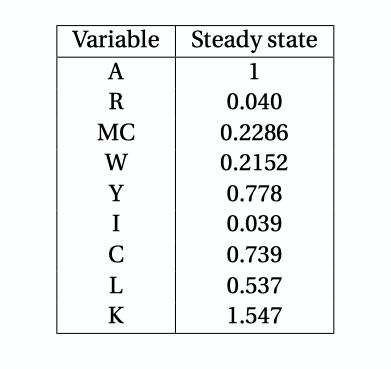

# 5. Log-linearization
$$\sigma \tilde{C_t}+\varphi\tilde{L_t} = \tilde{W_t}-\tilde{P_t}\tag{2.39}$$
$$\frac{\sigma}{\beta}(E_t \tilde{C_{t+1}}-\tilde{C_t}) = \frac{R_{ss}}{P_{ss}} E_t(\tilde{R_{t+1}}-\tilde{P_{t+1}})\tag{2.40}$$
$$\tilde{R_t}-\tilde{P_t}= \tilde{Y_t}-\tilde{K_t}\tag{2.41}$$
$$\tilde{W_t}-\tilde{P_t}= \tilde{Y_t}-\tilde{L_t}\tag{2.42}$$
$$\tilde{Y_t}= \tilde{A_t}+\alpha\tilde{K_t}+(1-\alpha)\tilde{L_t}\tag{2.43}$$
$$\tilde{K_{t+1}}=(1-\delta)\tilde{K_t}+\delta\tilde{I_t}\tag{2.44}$$
$$Y_{tt}\tilde{Y_{t}}=C_{ss}\tilde{C_t}+I_{ss}\tilde{I_t}\tag{2.45}$$
$$Y_{tt}\tilde{Y=A_{t}}= \rho_A \tilde{A_{t-1}}+\varepsilon_t\tag{2.46}$$
$$\tilde{MC_t} = (1-\alpha) \tilde{W_t}+\alpha \tilde{R_t}-\tilde{A_t}\tag{3.46}$$

## 5.1 Determining the NK Phillips curve

$$\tilde{\pi_t} = \beta E_t\tilde{\pi_{t+1}}+\Big[\frac{(1-\theta)(1-\beta\theta)}{\theta}\Big](\tilde{MC_t}-\tilde{P_t})\tag{3.50}$$